<a href="https://colab.research.google.com/github/Vishvaish/Machine-Learning-Models/blob/main/KNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KNN classification

K-nearest neighbors (KNN) classification is a non-parametric algorithm used for supervised learning. In KNN, the class of a new instance is determined by the majority vote of its k nearest neighbors in the feature space. The distance between instances is typically measured using Euclidean distance. KNN is a simple and effective algorithm that can be used for classification tasks, but it can be computationally expensive for large datasets and can suffer from the curse of dimensionality.

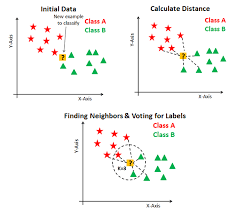

#Intention:

The intention of the code is to implement the k-nearest neighbors (KNN) classification algorithm from scratch using Python, without relying on machine learning packages. KNN is a non-parametric algorithm that classifies new instances based on the majority vote of their nearest neighbors in the feature space. The code aims to demonstrate how to implement KNN, calculate the F1 score for evaluation, and create a line plot to visualize the actual and predicted values.

# The code strives to achieve the following goals:

1. Define the Euclidean distance function to measure the similarity between feature vectors.

2. Implement the KNN classifier, which iterates through the test instances and finds the k nearest neighbors in the training data, determines their majority class label, and assigns it as the predicted label for the test instance.

3. Load a dataset from a CSV file and split it into features and target variables.

4. Split the dataset into training and test sets.
Define the value of k, which determines the number of neighbors to consider.
Train the KNN classifier on the training data and predict the labels for the test instances.

5. Calculate the F1 score to evaluate the performance of the model. The F1 score considers both precision and recall, providing a balanced assessment of the model's accuracy.

6. Create dataframes to store the actual and predicted values.


In [ ]:
import pandas as pd
data = pd.read_csv('/content/gender_classification_v7.csv')
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
data['gender'] = data['gender'].map({'Male':0,'Female':1})

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the Euclidean distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# Define the KNN classifier
def knn_classifier(X_train, y_train, X_test, k):
    y_pred = []
    for test_point in X_test:
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]
        sorted_indices = np.argsort(distances)
        k_nearest_labels = [y_train[idx] for idx in sorted_indices[:k]]
        most_common = np.bincount(k_nearest_labels).argmax()
        y_pred.append(most_common)
    return np.array(y_pred)

# Split dataset into features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into train and test sets
split_idx = int(0.8 * len(data))
X_train = X[:split_idx]
y_train = y[:split_idx]
X_test = X[split_idx:]
y_test = y[split_idx:]

# Define the value of k
k = 5

# Train and predict using the KNN classifier
y_pred = knn_classifier(X_train, y_train, X_test, k)

# Compute F1 score
tp = np.sum(np.logical_and(y_pred == 1, y_test == 1))
fp = np.sum(np.logical_and(y_pred == 1, y_test == 0))
fn = np.sum(np.logical_and(y_pred == 0, y_test == 1))
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * precision * recall / (precision + recall)
print('F1 score:', f1_score)

# Create actual and predicted dataframes
df_actual = pd.DataFrame({'Actual': y_test})
df_predicted = pd.DataFrame({'Predicted': y_pred})

# Create dataframe for actual and predicted values
df_result = pd.concat([df_actual, df_predicted], axis=1)
print(df_result.head())

F1 score: 0.974609375
   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       1          1
4       0          0


#Inference:

The inference drawn from the code revolves around understanding the performance of the KNN model and gaining insights into its ability to accurately classify instances.

#The code accomplishes the following steps to derive meaningful inferences:

1. Trains the KNN model using the training data and applies it to predict the labels for the test instances.

2. Computes the F1 score to evaluate the model's performance. A high F1 score indicates that the model has achieved a good balance between precision and recall, implying accurate classification.

3. Creates actual and predicted dataframes to store the true labels and predicted labels, respectively. These dataframes allow for further analysis and comparison.

4. A high F1 score indicate a well-performing model. 

# Pros of KNN Classification:

1. Simplicity: KNN is easy to understand and implement, making it a good choice for beginners or for quick prototyping.

2. No training phase: KNN is a lazy learner, meaning it doesn't require an explicit training phase. The model directly uses the training instances during the prediction phase.

3. Non-parametric: KNN makes no assumptions about the underlying data distribution, making it suitable for both linear and non-linear decision boundaries.

4. Flexibility: KNN can handle multi-class classification problems and can be applied to regression tasks by averaging the values of the k nearest neighbors.

5. Interpretable: KNN provides interpretability as the prediction is based on the actual instances in the feature space.



---


# Cons of KNN classification:

1. Computational complexity: The prediction phase of KNN can be computationally expensive, especially for large datasets, as it requires calculating distances between the new instance and all the training instances.

2. Memory requirements: KNN stores the entire training dataset in memory, which can be memory-intensive for datasets with a large number of instances or high-dimensional feature spaces.

3. Sensitivity to feature scaling: KNN is sensitive to the scale and range of features. It is essential to normalize or standardize the features to ensure accurate results.

4. Curse of dimensionality: KNN performance tends to degrade as the number of features increases. In high-dimensional spaces, the density of instances becomes sparse, and the nearest neighbors may not truly represent the local structure.

5. Optimal k selection: The choice of the parameter k (number of neighbors) is critical in KNN. Selecting an appropriate value of k can be challenging and may require experimentation or tuning.
